In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Read in the csv.
customer_data = pd.read_csv('customerdata4.csv')
# Call head() on the DataFrame to get the head of the DataFrame.
customer_data.head()

,CustomerID,Gender,Age,Annual Income (10kkr),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Call describe() on the DataFrame to get basic statistical data.
customer_data.describe()

,CustomerID,Age,Annual Income (10kkr),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Gender'>

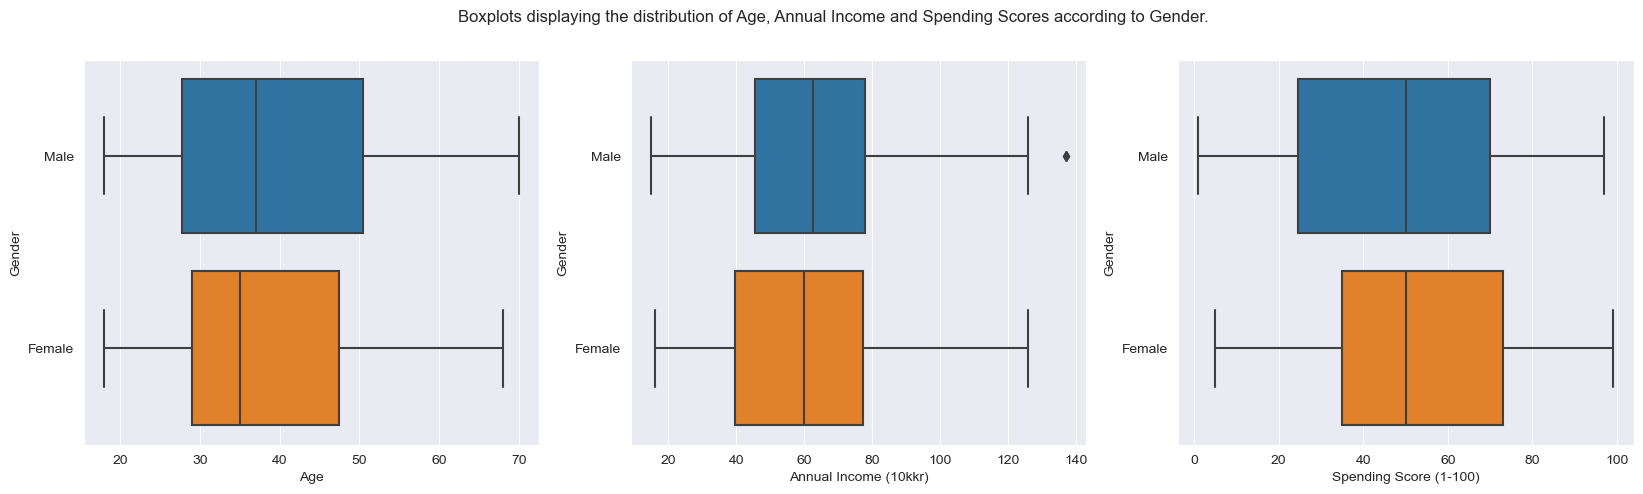

In [4]:
# Create a PyPlot SubPlot that's 1x3 in Figure Size.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
# Create a Figure Super Title to describe what the figure of diagrams is meant to show in total.
fig.suptitle('Boxplots displaying the distribution of Age, Annual Income and Spending Scores according to Gender.')

# Set up a BoxPlot of Age to Gender data BoxPlot Graph.
sns.boxplot(ax=ax1, data=customer_data, x="Age", y="Gender")
# Set up a BoxPlot of Annual Income to Gender data BoxPlot Graph.
sns.boxplot(ax=ax2, data=customer_data, x="Annual Income (10kkr)", y="Gender")
# Set up a BoxPlot of Spending Score to Gender data BoxPlot Graph.
sns.boxplot(ax=ax3, data=customer_data, x="Spending Score (1-100)", y="Gender")

In [5]:
# Drop all other data than the Spending Score and Annual Income columns.
separated = customer_data[['Spending Score (1-100)', 'Annual Income (10kkr)']]
# Create an NumPy Array of the separated DataFrame.
SSAI_Data = np.array(separated)

# From the SSAI (SpendingScoreAnnualIncome) data we can identify 5 clear central clusters of data.
k = 5
# Call KMeans with a cluster size of k and an init method of 'k-means++'.
# See: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=k, init='k-means++').fit(SSAI_Data)
# Get the centroid reference from the kmeans reference object.
centroids = kmeans.cluster_centers_

# We create a new Array called SSE for Sample Squared Errors
sse = []

# We create two arrays containing the data for Spending Score and Annual Income (SS-AI)
# We reference these new arrays as x1 and x2
x1 = np.array(SSAI_Data[:,0])
x2 = np.array(SSAI_Data[:,1])

# Create a numpy stack containing the data of the x1 and x2 arrays.
# The axis value is the axis at which numpy will "stack" the data along.
X = np.stack((x1[:], x2[:]), axis=-1)

# Create a list with values 1-11.
k_list = list(range(1,12))

# Loops through the list creating fitted predictions with KMeans clusters of size 1 to size 11.
# Fitting the data X to this KMeans model and then appending the model inertia to the SSE array.
for k in k_list:
    km_model = KMeans(n_clusters=k)
    km_model.fit(X)
    sse.append(km_model.inertia_)

C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


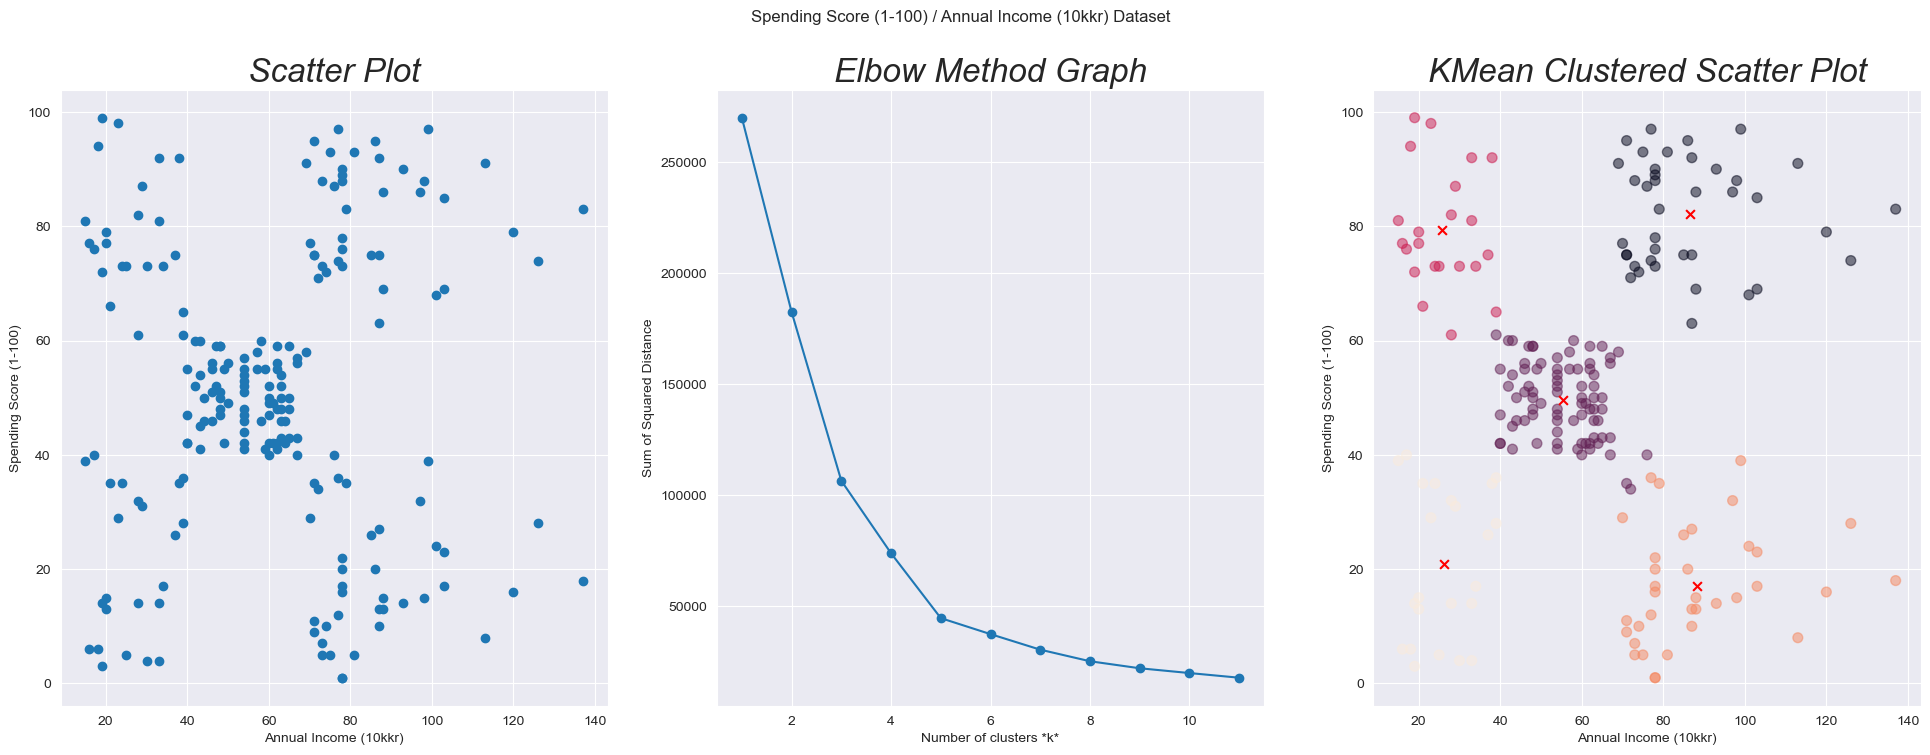

In [6]:
# Set up a new figure of size 24x and 8y units.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,8))

fig.suptitle('Spending Score (1-100) / Annual Income (10kkr) Dataset')

ax1.set_title('Scatter Plot', fontdict={'fontsize':24}, fontstyle='italic')
# Sets the X-axis Label to be 'Annual Income (10kkr)'
ax1.set_xlabel('Annual Income (10kkr)')
# Sets the Y-axis Label to be 'Spending Score (1-100)'
ax1.set_ylabel('Spending Score (1-100)')
# Populate the figure using a Scatter Plot using Age for the X-axis and Spending Score for the Y-axis.
ax1.scatter(SSAI_Data[:,1], SSAI_Data[:,0], label='True Position')

ax2.set_title('Elbow Method Graph', fontdict={'fontsize':24}, fontstyle='italic')
# Plots the k_list steps [1..11] to the SSE list inertia values.
ax2.plot(k_list, sse, '-o')
# Sets the X-label
ax2.set_xlabel(r'Number of clusters *k*')
# Sets the Y-label
ax2.set_ylabel('Sum of Squared Distance')

ax3.set_title('KMean Clustered Scatter Plot', fontdict={'fontsize':24}, fontstyle='italic')
# Sets the X-axis Label to be 'Annual Income (10kkr)'
ax3.set_xlabel('Annual Income (10kkr)')
# Sets the Y-axis Label to be 'Spending Score (1-100)'
ax3.set_ylabel('Spending Score (1-100)')
# Populate the figure using a Scatter Plot using Age for the X-axis and Spending Score for the Y-axis.
ax3.scatter(SSAI_Data[:,1], SSAI_Data[:,0], c=kmeans.labels_.astype (float), s=50, alpha=0.5)
# Populate the figure using a Scatter Plot using the XY-coordinates of the Centroids displaying them as Red X markers.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
ax3.scatter(centroids[:,1], centroids[:,0], c='red', s=40, marker='x')

# Call PyPlot.show().
plt.show()

# Clustering Conclusion

By doing a scatter diagram of Annual Income and Spending Score, we can identify that there is no clear linear correlation between these two datasets, however we can clearly identify 5 centroid clusters.
Clusters:
<ol>
    <li>
        <strong>Low-Income Low-Spending:</strong>
        <ul>
            <li>
                <p>The Low-Income Low-Spending individuals are of <strong>low to no interest</strong> to the retail buisness.</p>
            </li>
            <li>
                <p>Their annual income and spending habits are no condusive to sales growth, and tend to not be customers you'd want to foster.</p>
            </li>
        </ul>
    </li>
    <li>
        <strong>Low-Income High-Spending:</strong>
        <ul>
            <li>
                <p>The Low-Income High-Spending individuals are traditionally of <strong>low-interest</strong> to the retail buisness.</p>
            </li>
            <li>
                <p>However, their spending habits could be indicative of bad shopping related habits and could be manipulated and taken advantage of using a store credit program.</p>
            </li>
            <li>
                <p>However, their general income and spending habits are not condusive to healthy sales growth</p>
            </li>
        </ul>
    </li>
    <li>
        <strong>Medium-Income Medium-Spending:</strong>
        <ul>
            <li>
                <p>The Medium-Income Medium-Spending individuals are of <strong>significant interest</strong> to the retail buisness.</p>
            </li>
            <li>
                <p>Their annual income coupled with a clear linear spending habit in contrast to their income, makes these customers ideal for sales growth.</p>
            </li>
        </ul>
    </li>
    <li>
        <strong>High-Income High-Spending:</strong>
        <ul>
            <li>
                <p>The High-Income High-Spending individuals are of <strong>great interest</strong> to the retail buisness.</p>
            </li>
            <li>
                <p>Their annual income and spending habits are exactly what the retail business wants to foster, and can yield high turnover numbers if these customers are nutured properly.</p>
            </li>
        </ul>
    </li>
    <li>
        <strong>High-Income Low-Spending:</strong>
        <ul>
            <li>
                <p>The High-Income Low-Spending individuals are of <strong>some interest</strong> to the retail buisness.</p>
            </li>
            <li>
                <p>Their annual income and spending habits are potentially highly lucerative, however work has to be invested into attracting these money conservative customers.</p>
            </li>
        </ul>
    </li>
</ol>

In [7]:
# Drop all other data than the Spending Score and Age columns.
separated = customer_data[['Spending Score (1-100)', 'Age']]
# Create an NumPy Array of the separated DataFrame.
SSA_Data = np.array(separated)

# From the SSA (SpendingScoreAge) data we can identify 2-3 visually central clusters of data.
# For the purposes of this exercise I've chosen to separate it into 4 clusters as will be apparent when looking at the Elbow-graph below.
k = 4
# Call KMeans with a cluster size of k and an init method of 'k-means++'.
# See: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=k, init='k-means++').fit(SSA_Data)
# Get the centroid reference from the kmeans reference object.
centroids = kmeans.cluster_centers_

# We create a new Array called SSE for Sample Squared Errors
sse = []

# We create two arrays containing the data for Spending Score and Annual Income (SS-AI)
# We reference these new arrays as x1 and x2
x1 = np.array(SSA_Data[:,0])
x2 = np.array(SSA_Data[:,1])

# Create a numpy stack containing the data of the x1 and x2 arrays.
# The axis value is the axis at which numpy will "stack" the data along.
X = np.stack((x1[:], x2[:]), axis=-1)

# Create a list with values 1-11.
k_list = list(range(1,12))

# Loops through the list creating fitted predictions with KMeans clusters of size 1 to size 11.
# Fitting the data X to this KMeans model and then appending the model inertia to the SSE array.
for k in k_list:
    km_model = KMeans(n_clusters=k)
    km_model.fit(X)
    sse.append(km_model.inertia_)

C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


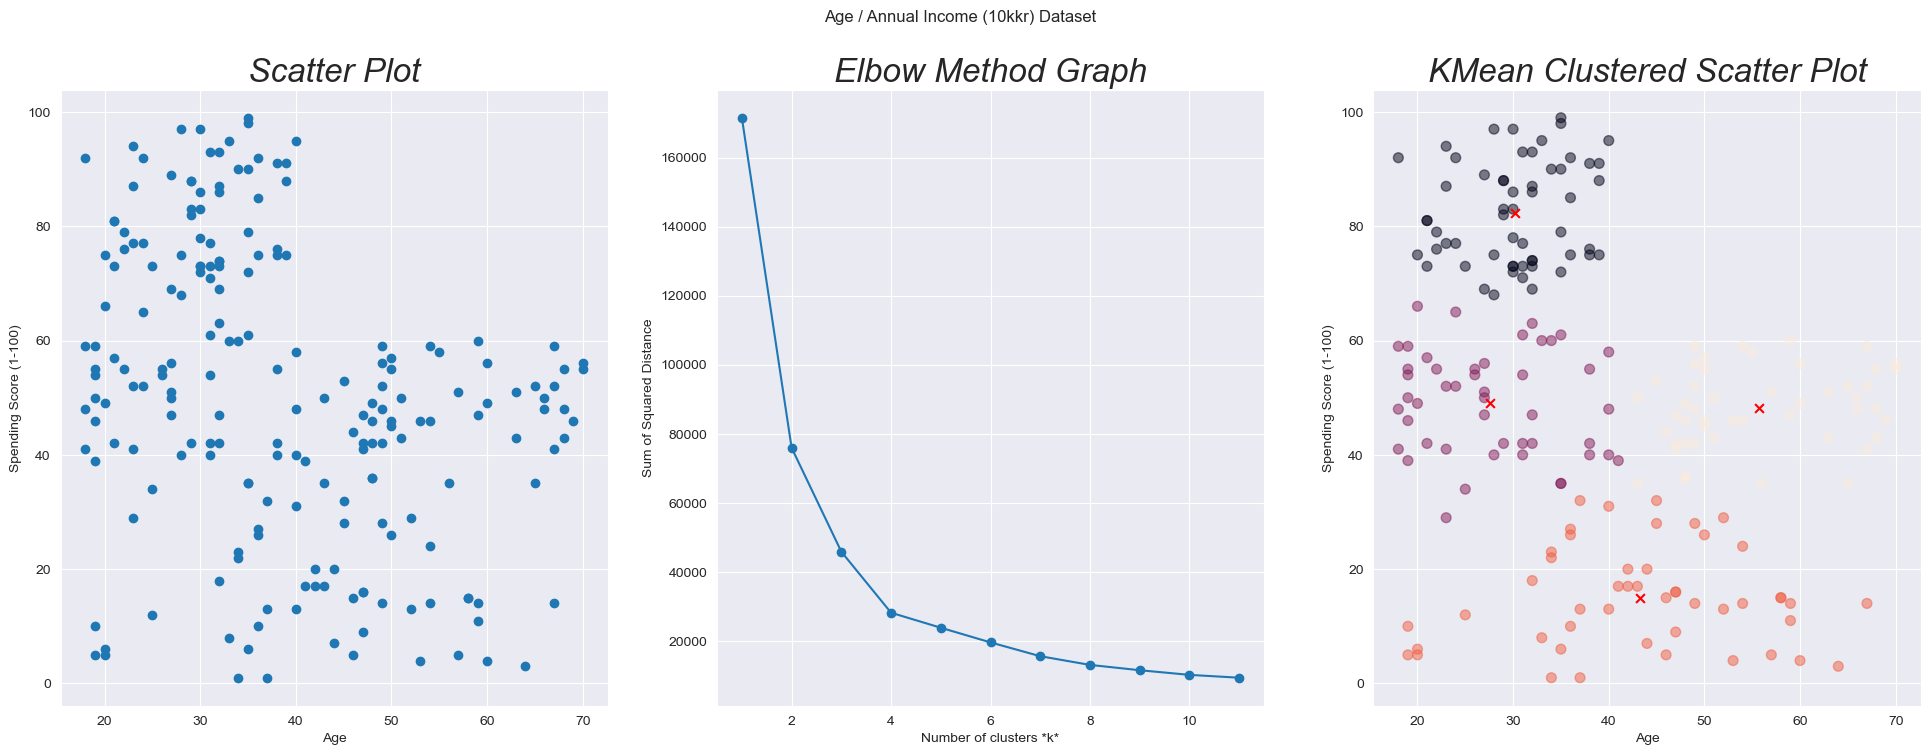

In [8]:
# Set up a new figure of size 24x and 8y units.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,8))

fig.suptitle('Age / Annual Income (10kkr) Dataset')

ax1.set_title('Scatter Plot', fontdict={'fontsize':24}, fontstyle='italic')
# Sets the X-axis Label to be 'Annual Income (10kkr)'
ax1.set_xlabel('Age')
# Sets the Y-axis Label to be 'Spending Score (1-100)'
ax1.set_ylabel('Spending Score (1-100)')
# Populate the figure using a Scatter Plot using Age for the X-axis and Spending Score for the Y-axis.
ax1.scatter(SSA_Data[:,1], SSA_Data[:,0], label='True Position')

ax2.set_title('Elbow Method Graph', fontdict={'fontsize':24}, fontstyle='italic')
# Plots the k_list steps [1..11] to the SSE list inertia values.
ax2.plot(k_list, sse, '-o')
# Sets the X-label
ax2.set_xlabel(r'Number of clusters *k*')
# Sets the Y-label
ax2.set_ylabel('Sum of Squared Distance')

ax3.set_title('KMean Clustered Scatter Plot', fontdict={'fontsize':24}, fontstyle='italic')
# Sets the X-axis Label to be 'Annual Income (10kkr)'
ax3.set_xlabel('Age')
# Sets the Y-axis Label to be 'Spending Score (1-100)'
ax3.set_ylabel('Spending Score (1-100)')
# Populate the figure using a Scatter Plot using Age for the X-axis and Spending Score for the Y-axis.
ax3.scatter(SSA_Data[:,1], SSA_Data[:,0], c=kmeans.labels_.astype (float), s=50, alpha=0.5)
# Populate the figure using a Scatter Plot using the XY-coordinates of the Centroids displaying them as Red X markers.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
ax3.scatter(centroids[:,1], centroids[:,0], c='red', s=40, marker='x')

# Call PyPlot.show().
plt.show()

# Clustering Conclusion

By doing a scatter diagram of Annual Income and Spending Score, we can clearly identify 4 centroid clusters.
Clusters:
<h1>High-Spending:</h1>
<p><strong>Central Age Tendancy:</strong> 18-40</p>
<p><strong>Defining Tendancies:</strong></p>
<ul>
    <li>
        <p>Tends to be centrally located to the age range of 18 to 40.</p>
    </li>
    <li>
        <p>Tends to be non-existant past 40, this could be due to the reality of reaching pensioning age getting closer and saving becoming a more attractive thing.</p>
    </li>
</ul>

<h1>Medium-Spending [18-40]:</h1>
<p><strong>Central Age Tendancy:</strong> 18-40</p>
<p><strong>Defining Tendancies:</strong></p>
<ul>
    <li>
        <p>Has a more loosely defined cluster of entries which could indicate risk-taking behaviour.</p>
    </li>
    <li>
        <p>Tends to 'fade out' past 40, this could be due to the reality of reaching pensioning age getting closer and saving becoming a more attractive thing.</p>
    </li>
</ul>

<h1>Medium-Spending [40-70]:</h1>
<p><strong>Central Age Tendancy:</strong> 40-70</p>
<p><strong>Defining Tendancies:</strong></p>
<ul>
    <li>
        <p>Has a more tighly defined cluster structure, which indicates more safe spending habits in general.</p>
    </li>
    <li>
        <p>As previously mentioned, this category's spending habits could be indicative of a more conservative approach due to the nearing of pensioning age.</p>
    </li>
</ul>

<h1>Low-Spending:</h1>
<p><strong>Central Age Tendancy:</strong> Full Range [18-70]</p>
<p><strong>Defining Tendancies:</strong></p>
<ul>
    <li>
        <p>This category spans the entire range gap and indicates a group of individuals with a lower-spending behavior.</p>
    </li>
    <li>
        <p>This category could indicate either people with lower monthly/annual incomes living on tight-budgets or very money conscious people.</p>
        <p>This category would be intressting to examine for further information as to what drives their conservative spending habits.</p>
    </li>
</ul>